# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** WAHYUNI FAJRIN ROSYIDAH
- **Email:** wahyunirosyidah@gmail.com
- **ID Dicoding:** M587B4KX4461

## Menentukan Pertanyaan Bisnis

- Bagaimana Tren Penyewaan Sepeda Sepanjang Tahun 2011 dan 2012? 
- Bagaimana Dampak Kondisi Cuaca Terhadap Jumlah Penyewaan Sepeda?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

## Data Wrangling

### Gathering Data

#### Load day table

In [2]:
day_df=pd.read_csv("dashboard/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Berdasarkan hasil diatas, diperoleh data kolom dan baris awal yang dimiliki oleh file day.csv

#### Load hour table

In [3]:
hour_df=pd.read_csv("dashboard/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Berdasarkan hasil diatas, diperoleh data kolom dan 5 baris awal yang dimiliki oleh file hour.csv

### Assessing Data

#### Menilai Data day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Berdasarkan hasil diatas, ditemukan kesalahan tipe data pada kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object (ini digunakan untuk tipe data string). 

##### Memeriksa duplikasi pada tabel day

In [5]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Berdasarkan hasil diatas, tidak ditemukan nilai duplikasi pada data day_df sehingga seluruh nilai dari tiap kolom aman untuk diolah.

#### Menilai Data hour_df

In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Berdasarkan hasil diatas, ditemukan kesalahan tipe data pada kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object (ini digunakan untuk tipe data string). 

##### Memeriksa duplikasi pada tabel hour

In [7]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Berdasarkan hasil diatas, tidak ditemukan nilai duplikasi pada data hour_df sehingga seluruh nilai dari tiap kolom aman untuk diolah.

### Cleaning Data

Pada proses assessing data, ditemukan kesalahan yang sama pada data day_df dan hour_df. Kesalahan yang ditemukan adalah tipe data pada kolom dteday yang didefinisikan sebagai object. Data yang disimpan oleh kolom dteday adalah data tanggal, oleh karena itu tipe data yang seharusnya dimiliki oleh kolom dteday adalah datetime.

Pada proses cleaning data ini akan dilakukan perubahan tipe data kolom dteday yang dimiliki oleh data dari day_df dan hour_df.

#### Clean day_df data

##### Menangani salah tipe data pada kolom dteday pada day_df

In [8]:
datetime_columns = ["dteday"]
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
  
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**

Berdasarkan hasil yang diperoleh, tipe data pada kolom dteday yang sebelumnya adalah object berhasil diubah ke tipe data yang seharusnya yaitu datetime

##### Menangani salah tipe data pada kolom dteday pada hour_df

In [9]:
datetime2_columns = ["dteday"]
for column in datetime2_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])
  
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**

Berdasarkan hasil yang diperoleh, tipe data pada kolom dteday yang sebelumnya adalah object berhasil diubah ke tipe data yang seharusnya yaitu datetime

## Exploratory Data Analysis (EDA)

### Explore day_df data

In [10]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**

- Berdasarkan rangkuman parameter statistik diatas, diperoleh jumlah penyewaan sepeda paling sedikit adalah 22 sepeda dan yang terbanyak adalah 8.714 sepeda dalam satu harinya. Pada penyewa casual, per harinya paling rendah adalah 2 sepeda dan 3.410 adalah jumlah penyewaan sepeda tertingginya. Sedangkan, pada penyewa registered, jumlah penyewaan sepeda paling sedikit adalah 20 sepeda dan jumlah terbanyak adalah 6946 sepeda dalam satu harinya.

##### Total Bike Rentals

In [11]:
total_casual = day_df['casual'].sum()
total_registered = day_df['registered'].sum()
total_all=total_casual+total_registered
print("Total Sewa Registered Users:", total_registered)
print("Total Sewa Casual Users:", total_casual)
print("Total Sewa All Users:", total_all)

Total Sewa Registered Users: 2672662
Total Sewa Casual Users: 620017
Total Sewa All Users: 3292679


**Insight:**
- Berdasarkan hasil diatas didapatkan total dari seluruh penyewaan sepeda selama tahun 2011-2012 yang tidak terdaftar adalah sebanyak 620.017 sepeda dan yang terdaftar sebanyak 2.672.662 sepeda. Total dari keseluruhan jumlah penyewa pada tahun 2011-2012 adalah 3.292.679 sepeda.

##### Total Bike Rentals by Membership Per Tahunnya

In [12]:
day_df['year'] = day_df['dteday'].dt.year
yearly_rentals = day_df.groupby(['year'])['cnt'].sum().reset_index()
day_df.groupby(by="year").agg({
    "registered":"sum",
    "casual":"sum",
    "cnt": "sum"
})

,registered,casual,cnt
year,,,
2011,995851,247252,1243103
2012,1676811,372765,2049576


**Insight:**
- Berdasarkan hasil diatas, diperoleh data jumlah seluruh sepeda yang dirental per tahunnya dan jumlah sepeda berdasarkan status keanggotaannya.
- Pada tahun 2011 dan 2012 didapatkan hasil dimana jumlah sepeda yang disewa dengan status keanggotaan registered lebih banyak dibandingkan dengan status keanggotaan casual. 
- Dalam periode waktu satu tahun, jumlah penyewaan sepeda cukup meningkat dibandingkan dengan tahun sebelumnya. Ini menunjukkan adanya peningkatan yang konsisten dalam jumlah pengguna layanan penyewaan sepeda

##### Total Bike Rentals Tertinggi

Mencari pada jumlah penyewaan tertinggi per bulan pada tahun 2011 dan 2012

In [13]:
day_df['year'] = day_df['dteday'].dt.year
day_df['month'] = day_df['dteday'].dt.month
monthly_rentals = day_df.groupby(['year', 'month'])['cnt'].sum().reset_index()

monthly_rentals['month'] = monthly_rentals['month'].apply(lambda x: calendar.month_name[x])
monthly_rentals['month'] = pd.Categorical(monthly_rentals['month'], categories=list(calendar.month_name[1:]), ordered=True)

year_2011= monthly_rentals[monthly_rentals['year'] == 2011]
highest_2011 = year_2011.loc[year_2011['cnt'].idxmax()]
highest_bymonth_2011 = highest_2011['month']
max_2011 = highest_2011['cnt']
    
year_2012= monthly_rentals[monthly_rentals['year'] == 2012]
highest_2012 = year_2012.loc[year_2012['cnt'].idxmax()]
highest_bymonth_2012 = highest_2012['month']
max_2012 = highest_2012['cnt']

print(f"Bulan dengan jumlah penyewa tertinggi di 2011: Bulan {highest_bymonth_2011}, dengan {max_2011} sepeda.")
print(f"Bulan dengan jumlah penyewa tertinggi di 2012: Bulan {highest_bymonth_2012}, dengan {max_2012} sepeda.")

Bulan dengan jumlah penyewa tertinggi di 2011: Bulan June, dengan 143512 sepeda.
Bulan dengan jumlah penyewa tertinggi di 2012: Bulan September, dengan 218573 sepeda.


**Insight:**
- Berdasarkan hasil diatas diperoleh jumlah penyewaan tertinggi pada tahun 2011 adalah pada bulan Juni dengan jumlah penyewaan 143512 dan pada tahun 2012 penyewaan tertinggi jatuh pada bulan September dengan total penyewaan 218573.

##### Total Bike Rentals Per Bulannya

In [14]:
monthly_rentals = day_df.groupby(['year', 'month'])['cnt'].sum().reset_index()
print(monthly_rentals)

    year  month     cnt
0   2011      1   38189
1   2011      2   48215
2   2011      3   64045
3   2011      4   94870
4   2011      5  135821
5   2011      6  143512
6   2011      7  141341
7   2011      8  136691
8   2011      9  127418
9   2011     10  123511
10  2011     11  102167
11  2011     12   87323
12  2012      1   96744
13  2012      2  103137
14  2012      3  164875
15  2012      4  174224
16  2012      5  195865
17  2012      6  202830
18  2012      7  203607
19  2012      8  214503
20  2012      9  218573
21  2012     10  198841
22  2012     11  152664
23  2012     12  123713


**Insight:**
- Berdasarkan hasil diatas, diperoleh data jumlah seluruh sepeda yang dirental per bulannya. Didapatan bahwa terjadi penurunan pada beberapa bulan terakhir pada tiap tahunnya.

##### Total Bike Rentals Berdasarkan Kondisi Cuaca

In [15]:
weather_conditions = {
    1: 'Clear, Few clouds',
    2: 'Mist + Cloudy',
    3: 'Light Snow, Light Rain',
    4: 'Heavy Rain, Ice Pallets'
}

day_df['weather_desc'] = day_df['weathersit'].map(weather_conditions)
result = day_df.groupby(by="weather_desc").agg({
    "cnt": ["max", "min", "mean", "std"]
})

result

cnt                               
                         max  min         mean          std
weather_desc                                               
Clear, Few clouds       8714  431  4876.786177  1879.483989
Light Snow, Light Rain  4639   22  1803.285714  1240.284449
Mist + Cloudy           8362  605  4035.862348  1809.109918

**Insight:**
- Berdasarkan kondisi cuaca per harinya, diperolah bahwa penyewaan tertinggi terjadi saat cuada cerah, sedikit berawan. Pada saat cuaca berkabut+berawan, jumlah penyewaan sepeda sedikit menurun. Sedangkan pada kondisi cuaca dengan gerimis, sedikit bersalju jumlah penyewaan mengalami penurunan drastis.

##### Total Bike Rentals Per Bulan Berdasarkan Kondisi Cuaca Tahun 2011 dan 2012

In [16]:
weather_conditions = {
    1: 'Clear, Few clouds',
    2: 'Mist + Cloudy',
    3: 'Light Snow, Light Rain',
    4: 'Heavy Rain, Ice Pallets'
}

day_df['weather_desc'] = day_df['weathersit'].map(weather_conditions)
monthly_weather_rentals = day_df.groupby(['year', 'month', 'weather_desc'])['cnt'].sum().reset_index()

weather_year_2011 = monthly_weather_rentals[monthly_weather_rentals['year'] == 2011]
max_weather_2011 = weather_year_2011.loc[weather_year_2011.groupby('month')['cnt'].idxmax()]

weather_year_2012 = monthly_weather_rentals[monthly_weather_rentals['year'] == 2012]
max_weather_2012 = weather_year_2012.loc[weather_year_2012.groupby('month')['cnt'].idxmax()]

max_weather_2011['month_name'] = max_weather_2011['month'].apply(lambda x: calendar.month_name[x])
max_weather_2012['month_name'] = max_weather_2012['month'].apply(lambda x: calendar.month_name[x])

print("Kondisi cuaca dengan penyewa terbanyak di tahun 2011:")
print(max_weather_2011[['month_name', 'weather_desc', 'cnt']])

print("\nKondisi cuaca dengan penyewa terbanyak di tahun 2012:")
print(max_weather_2012[['month_name', 'weather_desc', 'cnt']])


Kondisi cuaca dengan penyewa terbanyak di tahun 2011:
   month_name       weather_desc     cnt
0     January  Clear, Few clouds   21004
3    February  Clear, Few clouds   35190
5       March  Clear, Few clouds   39703
8       April  Clear, Few clouds   52392
11        May  Clear, Few clouds   87599
13       June  Clear, Few clouds  103863
15       July  Clear, Few clouds  122825
17     August  Clear, Few clouds  107467
21  September      Mist + Cloudy   67364
22    October  Clear, Few clouds   82959
25   November  Clear, Few clouds   72751
28   December  Clear, Few clouds   55808

Kondisi cuaca dengan penyewa terbanyak di tahun 2012:
   month_name       weather_desc     cnt
31    January  Clear, Few clouds   66387
33   February  Clear, Few clouds   69858
36      March  Clear, Few clouds  100286
38      April  Clear, Few clouds  144757
41        May  Clear, Few clouds  123239
43       June  Clear, Few clouds  174967
45       July  Clear, Few clouds  158541
48     August  Clear, Few clou

**Insight:**
- Berdasarkan kondisi cuaca per bulannya pada tahun 2011 dan 2012, didapatkan bahwa kondisi cuaca pada awal hingga pertengahan bulan cerah, sedikit berawan. Kondisi ini sangat mendukung dalam peningkatan jumlah penyewaan sepeda. Namun, terlihat bahwa total penyewaan pada 4-5 bulan terakhir tahun 2011 dan 2012 mengalami penurunan. Kondisi cuaca pada beberapa bulan terakhir tahun 2011 dan 2012 adalah berkabut+berawan.

##### Total Bike Rentals Berdasarkan Kondisi Cuaca Beberapa Bulan Terakhir Tahun 2011 dan 2012

In [17]:
print("Tahun 2011")
months_2011 = day_df[(day_df['year'] == 2011) & (day_df['month'].isin([8, 9, 10, 11, 12]))].copy()
months_2011['weather_desc'] = months_2011['weathersit'].map(weather_conditions)
weather_months_2011 = months_2011.groupby(['month', 'weather_desc'])['cnt'].sum().reset_index()
weather_months_2011['month_name'] = weather_months_2011['month'].apply(lambda x: calendar.month_name[x])
print(weather_months_2011[['month_name', 'weather_desc', 'cnt']])

print("\nTahun 2012")
months_2012 = day_df[(day_df['year'] == 2012) & (day_df['month'].isin([ 9, 10, 11, 12]))].copy()
months_2012['weather_desc'] = months_2012['weathersit'].map(weather_conditions)
weather_months_2012 = months_2012.groupby(['month', 'weather_desc'])['cnt'].sum().reset_index()
weather_months_2012['month_name'] = weather_months_2012['month'].apply(lambda x: calendar.month_name[x])
print(weather_months_2012[['month_name', 'weather_desc', 'cnt']])


Tahun 2011
   month_name            weather_desc     cnt
0      August       Clear, Few clouds  107467
1      August           Mist + Cloudy   29224
2   September       Clear, Few clouds   53506
3   September  Light Snow, Light Rain    6548
4   September           Mist + Cloudy   67364
5     October       Clear, Few clouds   82959
6     October  Light Snow, Light Rain    5467
7     October           Mist + Cloudy   35085
8    November       Clear, Few clouds   72751
9    November  Light Snow, Light Rain    6189
10   November           Mist + Cloudy   23227
11   December       Clear, Few clouds   55808
12   December  Light Snow, Light Rain    3299
13   December           Mist + Cloudy   28216

Tahun 2012
  month_name            weather_desc     cnt
0  September       Clear, Few clouds  168694
1  September           Mist + Cloudy   49879
2    October       Clear, Few clouds  104538
3    October  Light Snow, Light Rain    4661
4    October           Mist + Cloudy   89642
5   November     

**Insight:**
- Berdasarkan kondisi cuaca pada beberapa bulan terakhir pada tahun 2011 dan 2012, didapatkan bahwa kondisi cuaca tidak sebagus dengan cuaca pertengahan bulan yang ditandai terjadi gerimis dan sedikit bersalju pada beberapa bulan terakhir tahun 2011 dan 2012. Oleh karena itu, dapat dikatakan bahwa kondisi cuaca mempengaruhi tingkat penyewaan sepeda.

### Explore hour_df data

In [18]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**
- Berdasarkan rangkuman parameter statistik diatas, diperoleh jumlah penyewaan sepeda paling sedikit adalah 1 sepeda dan yang terbanyak adalah 977 sepeda per jamnya. Pada penyewa casual, per jamnya paling rendah adalah 0 sepeda dan 367 adalah nilai tertingginya. Sedangkan, pada penyewa registered, jumlah penyewaan sepeda paling sedikit adalah 0 sepeda dan jumlah terbanyak adalah 886 sepeda per jamnya.

##### Total Bike Rentals Per Jam Tahun 2011 dan 2012

In [19]:
hour_df.groupby(by="hr").agg({
    "cnt": ["max", "min", "mean", "std"]
})

cnt                            
    max min        mean         std
hr                                 
0   283   2   53.898072   42.307910
1   168   1   33.375691   33.538727
2   132   1   22.869930   26.578642
3    79   1   11.727403   13.239190
4    28   1    6.352941    4.143818
5    66   1   19.889819   13.200765
6   213   1   76.044138   55.084348
7   596   1  212.064649  161.441936
8   839   5  359.011004  235.189285
9   426  14  219.309491   93.703458
10  539   8  173.668501  102.205413
11  663  10  208.143054  127.495536
12  776   3  253.315934  145.081134
13  760  11  253.661180  148.107657
14  750  12  240.949246  147.271574
15  750   7  251.233196  144.632541
16  783  11  311.983562  148.682618
17  976  15  461.452055  232.656611
18  977  23  425.510989  224.639304
19  743  11  311.523352  161.050359
20  567  11  226.030220  119.670164
21  584   6  172.314560   89.788893
22  502   9  131.335165   69.937782
23  256   2   87.831044   50.846889

**Insight:**
- Berdasarkan hasil yang didapatkan, diperoleh jumlah penyewaan yang cukup tinggi terjadi pada jam 5 hingga 6 sore. Sedangkan jumlah penyewaan terendah terjadi pada jam 4 pagi.

In [20]:
weather_conditions = {
    1: 'Clear, Few clouds',
    2: 'Mist + Cloudy',
    3: 'Light Snow, Light Rain',
    4: 'Heavy Rain, Ice Pallets'
}

hour_df['weather_desc'] = hour_df['weathersit'].map(weather_conditions)
result = hour_df.groupby(by="weather_desc").agg({
    "cnt": ["max", "min", "mean", "std"]
})

result

cnt                            
                         max min        mean         std
weather_desc                                            
Clear, Few clouds        977   1  204.869272  189.487773
Heavy Rain, Ice Pallets  164  23   74.333333   77.925178
Light Snow, Light Rain   891   1  111.579281  133.781045
Mist + Cloudy            957   1  175.165493  165.431589

**Insight:**
Berdasarkan kondisi cuaca per jamnya, diperolah bahwa:
- Pada kondisi cuaca cerah, sedikit berawan (Clear, Few) clouds terjadi penyewaan yang tinggi	
- Pada kondisi cuaca berkabut dan berawan (Mist + Cloudy), jumlah penyewaan sepeda sedikit menurun, namun jumlahnya tidak jauh dengan jumlah penyewaan saat kondisi cuaca cerah
- Pada kondisi cuaca dengan gerimis, sedikit bersalju (Light Snow, Light Rain) jumlah penyewaan mengalami sedikit penurunan
- Pada kondisi cuaca dengan hujan deras, hujan es (Heavy Rain, Ice Pallets) jumlah penyewaan mengalami penurunan yang sangat drastis, namun pada kondisi ini kolom nilai minimum jumlah penyewaan sepeda, memiliki nilai yang tinggi dibandingkan dengan cuaca lain yaitu 23 sepeda


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Tren Penyewaan Sepeda Sepanjang Tahun 2011 dan 2012? 

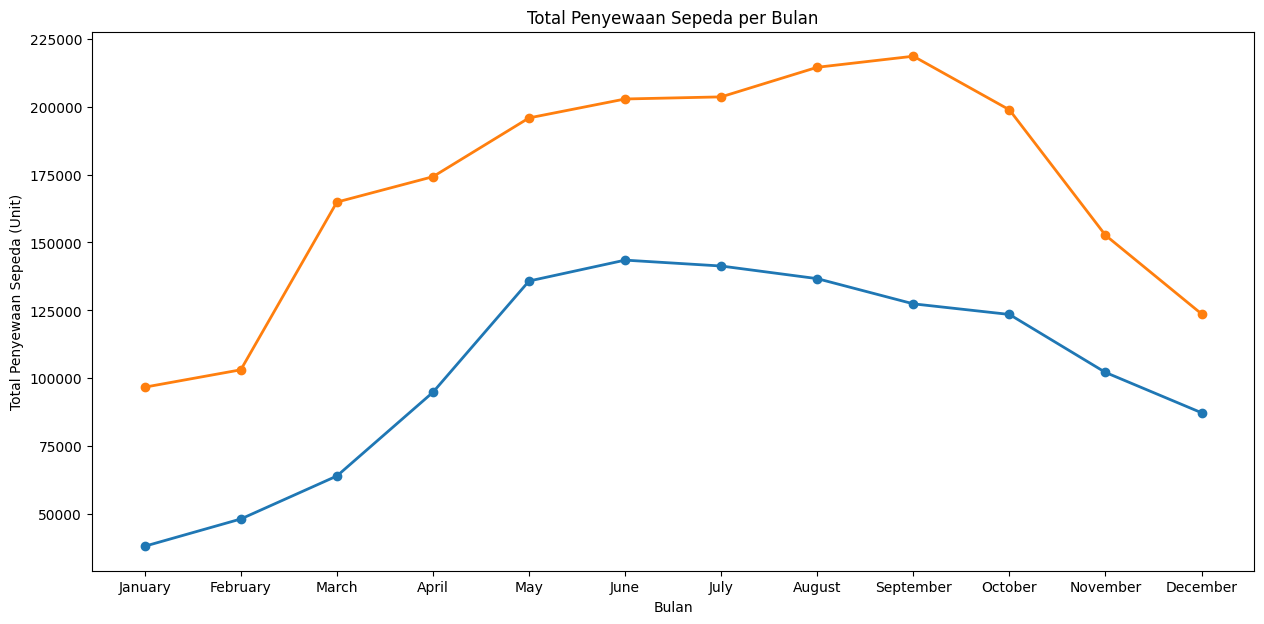

In [25]:
plt.figure(figsize=(15,7))
for year in monthly_rentals['year'].unique():
    monthly_rentals_data = monthly_rentals[monthly_rentals['year'] == year]
    plt.plot(monthly_rentals_data['month'], 
             monthly_rentals_data['cnt'], 
             label=f'Tahun {year}',
             marker='o', 
             linewidth=2
            )
    
plt.xticks(range(1, 13), labels=list(calendar.month_name[1:]))
plt.title('Total Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Penyewaan Sepeda (Unit)')
plt.show()

**Insight:**
Berdasarkan hasil yang didapatkan, diperoleh informasi bahwa terjadi peningkatan penyewaan sepeda yang pesat pada awal bulan hingga pertengahan bulan. Beberapa bulan sebelum akhir tahun 2011 terjadi penurunan yang signifikan, namun jumlah penyewaan sepeda pada awal tahun 2012 hingga pertengahan tahun kembali mengalami peningkatan yang signifikan.

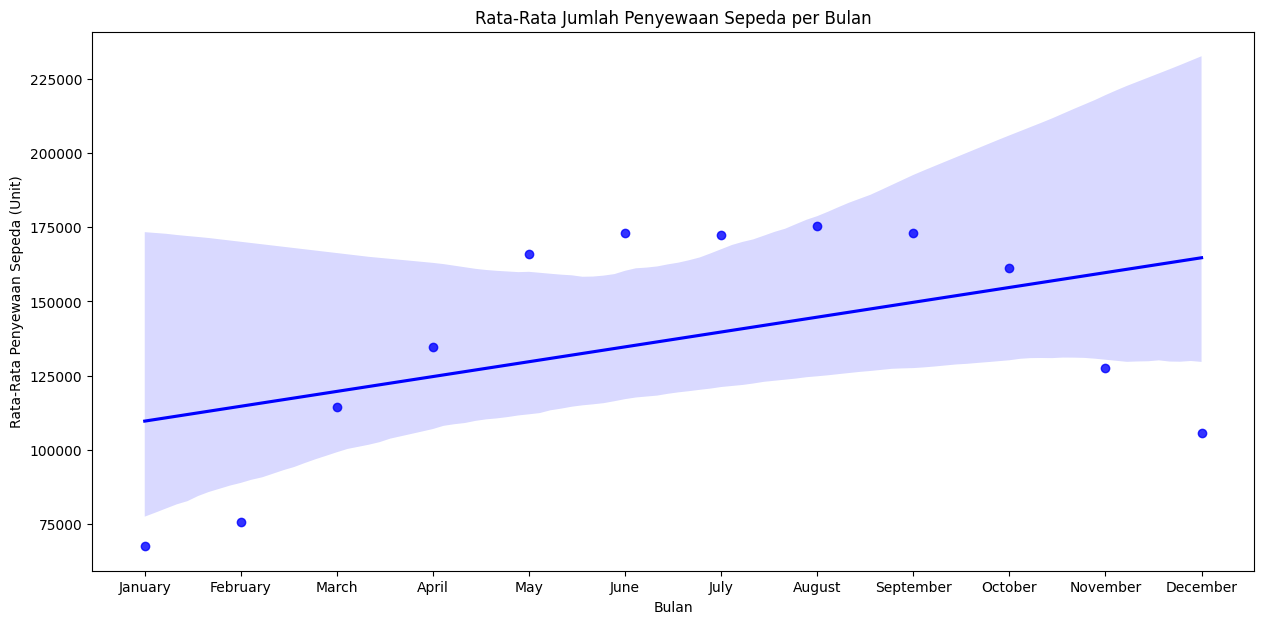

In [22]:
monthly_avg_rentals = monthly_rentals.groupby('month')['cnt'].mean().reset_index()
monthly_avg_rentals['month_num'] = range(1, 13)

plt.figure(figsize=(15,7))
sns.regplot(x='month_num', 
            y='cnt', 
            data=monthly_avg_rentals, 
            marker='o', 
            color='blue')

plt.xticks(range(1, 13), labels=list(calendar.month_name[1:]))
plt.title('Rata-Rata Jumlah Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-Rata Penyewaan Sepeda (Unit)')

plt.show()

**Insight:**
Pada visualisasi data di atas, diperoleh informasi:
- Tren Meningkat: Jumlah penyewa sepeda secara umum mengalami peningkatan dari awal hingga pertengahan tahun.
- Fluktuasi Musiman: Terdapat pola naik turun yang cukup signifikan pada jumlah penyewaan setiap bulannya, yang kemungkinan dipengaruhi oleh beberapa faktor tertentu.
- Stabilitas Tren: Garis tren menunjukkan kecenderungan peningkatan yang stabil, meskipun ada fluktuasi.
- Confidence Level: Bentuk pita pada pertengahan bulan terlihat semakin mengecil yang menandakan tingkat confidence level yang tinggi pada bulan tersebut. Semakin lebar area ini, semakin bervariasi data di sekitar rata-rata tren tersebut yang menandakan ada variasi atau fluktuasi jumlah penyewaan sepeda.



### Pertanyaan 2: Bagaimana Dampak Kondisi Cuaca Terhadap Jumlah Penyewaan Sepeda?

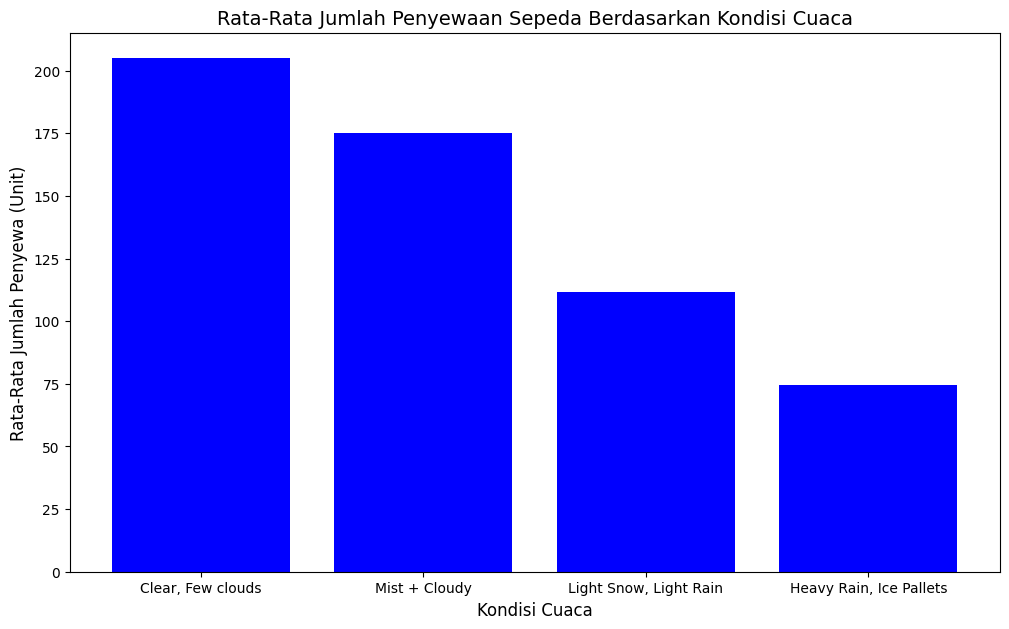

In [23]:
weather_avg_rentals = hour_df.groupby('weathersit')['cnt'].mean().reset_index()

weather_avg_rentals['weather_desc'] = weather_avg_rentals['weathersit'].map(weather_conditions)

plt.figure(figsize=(12, 7))
plt.bar(weather_avg_rentals['weather_desc'], 
        weather_avg_rentals['cnt'], 
        color='blue')

plt.title('Rata-Rata Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca', fontsize=14)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Rata-Rata Jumlah Penyewa (Unit)', fontsize=12)

plt.show()

**Insight:**
Berdasarkan hasil yang didapatkan, diperoleh informasi bahwa terdapat perbedaan hasil jumlah penyewaan sepeda pada tiap kondisi cuaca. 
- Pada kondisi cuaca cerah, sedikit berawan (Clear, Few) clouds terjadi penyewaan yang tinggi	
- Pada kondisi cuaca berkabut dan berawan (Mist + Cloudy), jumlah penyewaan sepeda mengalami sedikit penurunan
- Pada kondisi cuaca dengan gerimis, sedikit bersalju (Light Snow, Light Rain) jumlah penyewaan mengalami penurunan yang cukup drastis
- Pada kondisi cuaca dengan hujan deras, hujan es (Heavy Rain, Ice Pallets) jumlah penyewaan mengalami penurunan yang sangat drastis

### Analisis Tambahan : Bagaimana Pengaruh Waktu Terhadap Jumlah Penyewaan Sepeda?

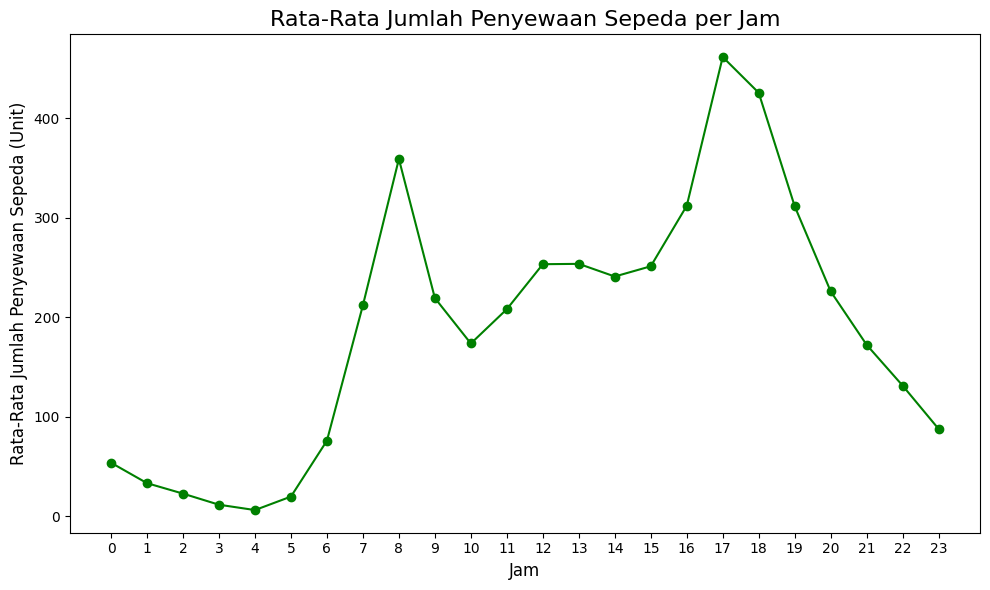

In [24]:
hourly_avg = hour_df.groupby("hr")["cnt"].mean().reset_index()
plt.figure(figsize=(10, 6))

plt.plot(hourly_avg['hr'], hourly_avg['cnt'], label='Mean', marker='o', color='green')

plt.title('Rata-Rata Jumlah Penyewaan Sepeda per Jam', fontsize=16)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Rata-Rata Jumlah Penyewaan Sepeda (Unit)', fontsize=12)

plt.xticks(range(0,24)) 
plt.tight_layout()
plt.show()


**Insight:**
Berdasarkan hasil yang diperoleh, terdapat informasi rata-rata penyewaan sepeda per jam pada tahun 2011-2012
- Pagi hingga sore hari: Terjadi peningkatan jumlah penyewaan sepeda. Pada jam-jam ini, orang-orang cenderung melakukan aktivitas produktif seperti bekerja atau sekolah.
- Menjelang malam hari: Jumlah penyewaan sepeda menurun, karena pada waktu ini kebanyakan orang sudah kembali ke rumah untuk beristirahat.

## Conclusion

#### 1. Bagaimana Tren Penyewaan Sepeda Sepanjang Tahun 2011 dan 2012? 
   
   Berdasarkan hasil yang didapatkan, penyewaan sepeda mengalami peningkatan yang pesat dari awal hingga pertengahan tahun. Namun, terjadi penurunan signifikan menjelang akhir tahun 2011. Pada awal hingga pertengahan tahun 2012, jumlah penyewaan kembali meningkat dengan pola yang mirip.
   
   Fluktuasi ini kemungkinan dipengaruhi oleh faktor musiman, sehingga penyewaan sepeda naik-turun setiap bulan. Garis tren secara keseluruhan menunjukkan peningkatan yang konsisten sepanjang periode tersebut. Pada pertengahan bulan, pita visualisasi menyempit, yang menandakan tingkat kepastian yang lebih tinggi dengan variasi data yang lebih sedikit.

#### 2. Bagaimana Dampak Kondisi Cuaca Terhadap Jumlah Penyewaan Sepeda

Berdasarkan hasil yang diperoleh, kondisi cuaca berpengaruh signifikan terhadap jumlah penyewaan sepeda:
- Cuaca cerah atau sedikit berawan (Clear, Few Clouds): Penyewaan sepeda cenderung tinggi, karena kondisi ini sangat mendukung aktivitas di luar ruangan.
- Cuaca berkabut dan berawan (Mist + Cloudy): Jumlah penyewaan sepeda mengalami sedikit penurunan, meskipun masih ada aktivitas penyewaan.
- Cuaca gerimis atau sedikit bersalju (Light Snow, Light Rain): Penyewaan sepeda menurun cukup drastis, kemungkinan karena kondisi ini membuat orang merasa kurang nyaman untuk bersepeda.
- Cuaca dengan hujan deras atau hujan es (Heavy Rain, Ice Pellets): Terjadi penurunan penyewaan yang sangat signifikan, karena cuaca ini tidak mendukung bersepeda.

Dengan demikian, penyewaan sepeda lebih tinggi saat cuaca memungkinkan untuk beraktivitas di luar ruangan, terutama pada jam-jam sibuk di siang hari.
#### 3. Bagaimana Pengaruh Waktu Terhadap Jumlah Penyewaan Sepeda?

Berdasarkan data rata-rata penyewaan sepeda per jam pada tahun 2011-2012, terlihat adanya pola yang jelas terkait waktu:
   - Pagi hingga sore hari: Jumlah penyewaan sepeda meningkat, terutama selama jam produktif ketika banyak orang bepergian untuk bekerja atau sekolah.
   - Menjelang malam hari: Jumlah penyewaan sepeda menurun signifikan, karena sebagian besar orang sudah kembali ke rumah untuk beristirahat setelah beraktivitas sepanjang hari.

Oleh karena itu, dapat disimpulkan bahwa penyewaan sepeda lebih banyak terjadi selama jam-jam produktif, dan menurun pada malam hari ketika aktivitas berkurang.





